In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from qcodes.dataset.database import initialise_database
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.experiment_container import new_experiment

from qcodes.instrument_drivers.tektronix.DPO7200xx import TektronixDPO7000xx

In [2]:
tek = TektronixDPO7000xx("tek3", "TCPIP0::10.193.36.56::inst0::INSTR")

Connected to: TEKTRONIX DPO72004C (serial:C600651, firmware:CF:91.1CT FV:10.8.3 Build 3) in 0.58s


In [3]:
initialise_database()
experiment = new_experiment(name='DPO_72000_example', sample_name="no sample")

In [4]:
tek.channel[0].set_trace_time(2E-3)

Starting experimental run with id: 79


([<matplotlib.axes._subplots.AxesSubplot at 0x2341a1f7f60>,
 [None, None])

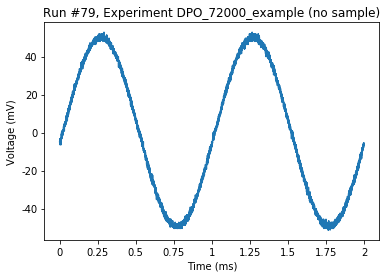

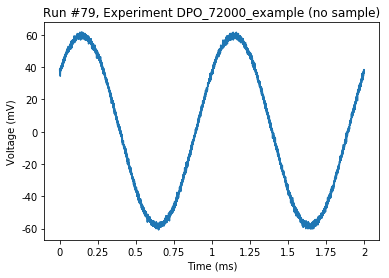

In [5]:
meas = Measurement(exp=experiment)
meas.register_parameter(tek.channel[0].trace)
meas.register_parameter(tek.channel[1].trace)

with meas.run() as datasaver:
    for i in [0, 1]:
        datasaver.add_result(
            (tek.channel[i].trace_axis, tek.channel[i].trace_axis()),
            (tek.channel[i].trace, tek.channel[i].trace())
        )

    dataid = datasaver.run_id

plot_by_id(dataid)

In [6]:
tek.measurement[0].source1("CH1")
tek.measurement[0].type("frequency")
value = tek.measurement[0].value()
unit = tek.measurement[0].value.unit

print(f"{value} {unit}")

999.60015993603 Hz


In [7]:
tek.measurement[0].type("amplitude")
value = tek.measurement[0].value()
unit = tek.measurement[0].value.unit

print(f"{value} {unit}")

0.09680000685155 V


In [8]:
tek.measurement[0].source1("CH2")
value = tek.measurement[0].value()
unit = tek.measurement[0].value.unit

print(f"{value} {unit}")

0.11680000826716 V


In [9]:
tek.measurement[0].source1("CH1")
tek.measurement[0].source2("CH2")
tek.measurement[0].type("phase")
value = tek.measurement[0].value()
unit = tek.measurement[0].value.unit

print(f"{value} {unit}")

-42.90341931614 °


In [10]:
assert tek.measurement[0].value.unit == tek.measurement[0].unit()

In [12]:
import time 
import timeit

In [28]:
timer = timeit.Timer("time.sleep(100E-3)")
all(t >= 1E-3 * 0.99 for t in timer.repeat(repeat=1000, number=1))

True

In [29]:
reps = timer.repeat(repeat=1000, number=1)

In [37]:
np.std([i - 100E-3 for i in reps]) / 100E-3 * 100

0.32203230440724845